Primero cargamos un par de librerías que ocuparemos, luego guardamos la información del CSV a una variable.

In [18]:
import numpy as np
import pandas as pd

bienestar_df = pd.read_csv('indicadores_bienestar_2014.csv',  index_col = 0, encoding='utf8')
bienestar_df.index.names = ['Entidad']
bienestar_df.columns.names = ['Indicador']

# Se quitara el renglon que tiene indicadores del país entero
bienestar_df = bienestar_df[1:]
bienestar_df.head()

Indicador,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Entidad,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Baja California Sur,84.9,43.85,91.6,3.0,52.6,5.44,37.2,66.9,85.0,76.2,...,22.1,1.6,6.3,39.05,4.6,66.1,6.1,80.5,1.0,74.8
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7
Coahuila de Zaragoza,87.2,34.56,96.0,6.5,45.0,7.62,34.3,59.2,81.4,76.0,...,24.8,1.7,9.5,37.44,4.4,61.9,8.4,72.0,1.1,77.8


Se escogen los indicadores que nos interesa analizar y vemos una descripción general de los datos que se han tomado

In [17]:
columnas = ['Hogares con acceso a banda ancha', 'Participación electoral',
           'Niveles de educación', 'Años promedio de escolaridad',
           'Satisfacción con tiempo para ocio']
bienestarSel_df = bienestar_df[columnas]
bienestarSel_df.head()

Indicador,Hogares con acceso a banda ancha,Participación electoral,Niveles de educación,Años promedio de escolaridad,Satisfacción con tiempo para ocio
Entidad,,,,,
Aguascalientes,37.92,37.2,42.5,9.7,7.3
Baja California,51.46,30.9,44.8,9.7,8.0
Baja California Sur,43.85,52.6,48.4,9.8,8.0
Campeche,27.10,61.2,40.6,9.1,7.6
Coahuila de Zaragoza,34.56,45.0,42.9,9.8,7.8


Vamos a ver una descripción de los datos que se han tomado

In [19]:
bienestarSel_df.describe()

Indicador,Hogares con acceso a banda ancha,Participación electoral,Niveles de educación,Años promedio de escolaridad,Satisfacción con tiempo para ocio
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,33.519375,48.153125,39.875000,9.096875,7.746875
std,11.083372,9.238000,6.587917,0.819711,0.247548
min,9.470000,30.900000,27.700000,7.200000,7.300000
25%,25.762500,41.675000,35.425000,8.675000,7.600000
50%,32.825000,45.950000,40.700000,9.200000,7.750000
75%,41.765000,55.575000,43.100000,9.525000,7.925000
max,55.100000,70.900000,58.800000,11.100000,8.300000


# Reducción de dimensionalidad con PCA

Para tener una mejor visualización de estos datos, haremos una reducción del espacio a uno que se pueda ver mejor lo daots, y es por esto que se hará un analisís de los componentes principales de estos datos y tomaremos los primeros componentes principales para poder mostrar estos datos en $\mathbb{R}^2$.

Para esto se utilizará la herramienta de Sklearn.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(bienestarSel_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Con el objeto pca previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [23]:
bienestarSel_pca = pca.transform(bienestarSel_df)

Tambien hubieramos podido llamar simplemente fit_transform para hacer ambos pasos en uno solo. Ahora vamos a transformar el ndarray que obtuvimos en un DataFrame de Pandas para mantener el formato.

In [26]:
bienestarSel_pca_df = pd.DataFrame(bienestarSel_pca)
bienestarSel_pca_df.index = bienestarSel_df.index
bienestarSel_pca_df.columns = ['CP_1','CP_2']
bienestarSel_pca_df.head()

,CP_1,CP_2
Entidad,,
Aguascalientes,-5.843398,-10.579767
Baja California,-19.181628,-16.203212
Baja California Sur,-12.862508,5.387104
Campeche,6.103922,12.816674
Coahuila de Zaragoza,-2.606039,-2.901955


La varianza de los datos que explican los dos primeros componentes principales es:

In [27]:
print(pca.explained_variance_ratio_)

[0.62730703 0.33749214]


Ya estamos listos para imprimir los resultados.

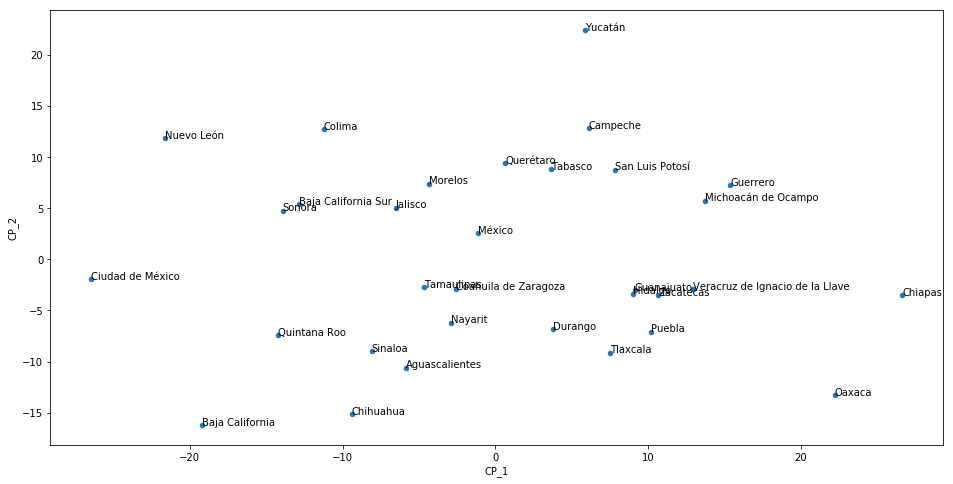

In [34]:
%matplotlib inline

ax = bienestarSel_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))


for i, estado in enumerate(bienestarSel_pca_df.index):
    ax.annotate(estado, (bienestarSel_pca_df.iloc[i].CP_1, bienestarSel_pca_df.iloc[i].CP_2))

El primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de los estados a lo largo del eje CP_1 explica mejor las diferencias entre paises. 

# Buscando similitudes entre paises usando las K-medias

Ahora utilizaremos las k-medias para agrupar a las 32 entidades.


Text(0.5,1,'Selección de K con el método del codo')

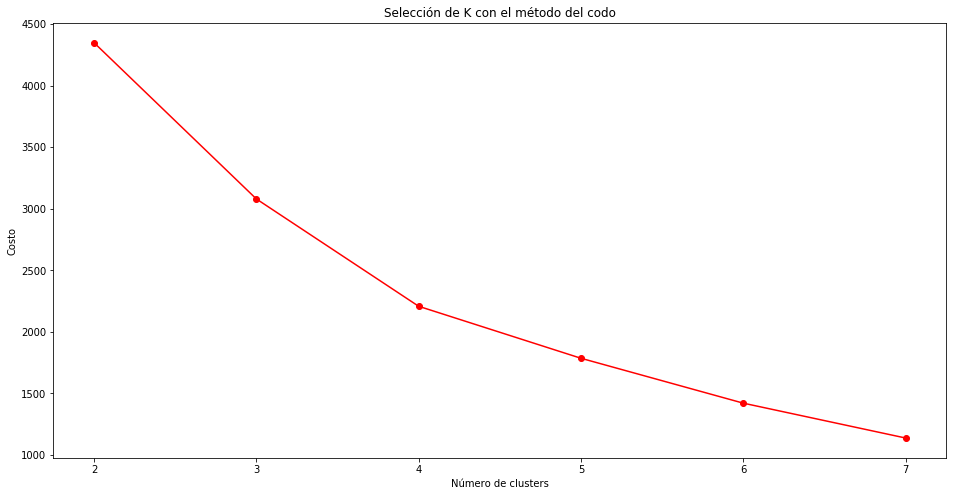

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 7
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestarSel_df)
    costos.append(-kmeans.score(bienestarSel_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

Analizando la gráfica anterior, podemos notar 2 puntos de inflexión importantes, en 3 y en 4.

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

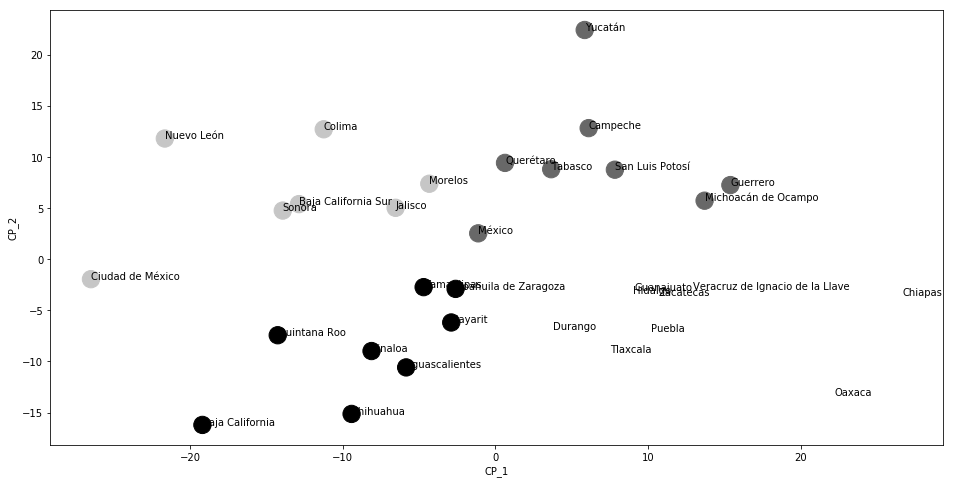

In [39]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestarSel_df)
bienestarSel_pca_df['grupos'] = pd.Series(clusters.labels_, index=bienestarSel_pca_df.index)


ax = bienestarSel_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=bienestarSel_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(bienestarSel_pca_df.index):
    ax.annotate(pais, (bienestarSel_pca_df.iloc[i].CP_1, bienestarSel_pca_df.iloc[i].CP_2))


Ya se tiene un primer análisis. Sin embargo no se tiene una idea clara de que significan los clusters. Para eso se va a analizar los prototipos de clases que tenemos, y los cuales están asociados con los estados.

In [41]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestarSel_df.columns
prototipos_df.index.names = ['Protopipo']
prototipos_df.columns.names = ['Indicadores']

prototipos_df

Indicadores,Hogares con acceso a banda ancha,Participación electoral,Niveles de educación,Años promedio de escolaridad,Satisfacción con tiempo para ocio
Protopipo,,,,,
P1,22.504444,43.133333,33.388889,8.366667,7.622222
P2,46.128571,53.700000,46.471429,9.857143,7.800000
P3,27.803750,58.225000,38.125000,8.825000,7.700000
P4,40.593750,38.875000,43.150000,9.525000,7.887500


Y veremos las diferencias entre los 8 indicadores para los 4 prototipos obtenidos.

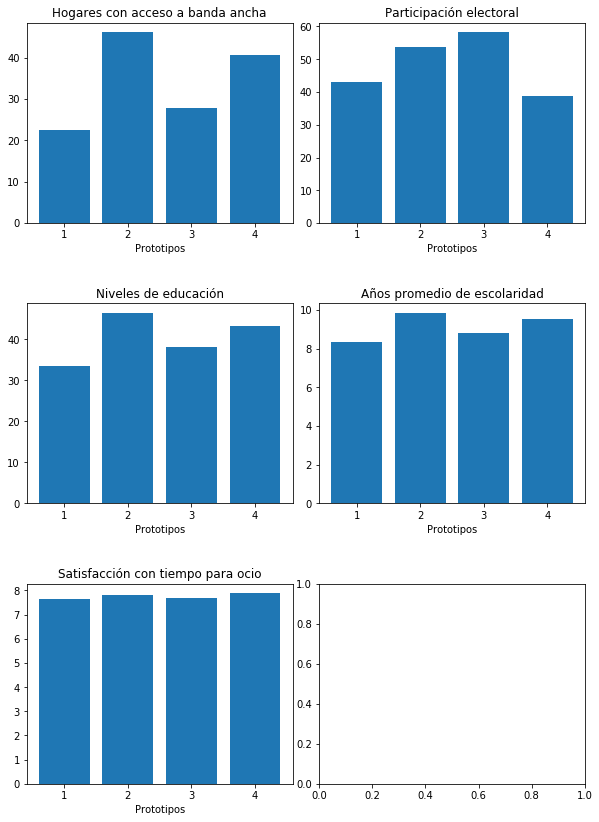

In [46]:
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (10, 14))

ind = [(i, j) for i in range(4) for j in range(2)]

for indicador, (i, j) in zip(columnas, ind):
    axes[i, j].bar([1, 2, 3, 4], prototipos_df[indicador])
    axes[i, j].set(title = indicador)
    axes[i, j].set(xlabel = 'Prototipos')

fig.subplots_adjust(wspace = 0.1, hspace = 0.4)

Hay prototipos que parecen indicar que hay una relación entre hogares que tienen banda ancha con los niveles de educación que tienen.

Parece que no importa muchos los otros indicadores para afectar la satisfacción con tiempo de ocio.